#  WEEK 2: DATA PREPROCESSING & FEATURE ENGINEERING


---

##  Week 2 Objectives:

1.  Handle outliers (Winsorization at 1% and 99%)
2.  Transform target (Signed log to reduce skewness)
3.  Impute missing values (ROE, leverage, province)
4.  Create temporal split (2019-2020 train, 2021 val)
5.  Scale features (RobustScaler for outliers)
6.  Save cleaned datasets

---

##  Success Criteria:

**Input:**
- Skewness: 47.3 (extreme!)
- Outliers: Max 302,126%
- Missing: 25% in target

**Output:**
- Skewness: < 2 (near-normal) 
- Outliers: Clipped to reasonable range 
- Missing: Imputed or dropped 
- Clean train/val split 

---

**Based on Week 1 insights, we identified 7 problems.**

---

Import Libraries & Load Data

In [ ]:
# ========================================
# CELL 2: Import Libraries & Load Data
# ========================================

# Data manipulation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools
from scipy import stats

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)  

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Libraries imported successfully!")

# ========================================
# Load Training Data
# ========================================

# File path
TRAIN_PATH = '../data/processed/train_data.csv'

# Load data
print("\n Loading training data...")
df = pd.read_csv(TRAIN_PATH)

print(f" Data loaded!")
print(f" Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Target variable
TARGET = 'revenue_change'

# Display first rows
print("\n First 3 rows:")
print(df.head(3))  

 Libraries imported successfully!

 Loading training data...
 Data loaded!
 Shape: 11,828 rows × 30 columns

👀 First 3 rows:
   company_id  fiscal_year province    region  ateco_sector legal_form  \
0  COMP_00000         2018      NaN  Campania            47        SRL   
1  COMP_00000         2019      NaN  Campania            47        SRL   
2  COMP_00000         2020      NaN  Campania            47        SRL   

   years_in_business  total_fixed_assets  current_assets    total_assets  \
0                 32      242234260.6100  950481877.2800 1192716137.8900   
1                 33       39836387.0900  141122561.1100  180958948.2000   
2                 34      666225046.9700 1367208082.4600 2033433129.4300   

   shareholders_equity      total_debt  short_term_debt  long_term_debt  \
0       372870210.9600  819845926.9300   560184200.2500  259661726.6800   
1        57007011.2900  123951936.9200    71353454.6600   52598482.2500   
2       302904566.8000 1730528562.6300   9904003

##  Week 1 Insights Recap

**Problems Identified:**

| Problem | Value | Target | Status |
|---------|-------|--------|--------|
| **Skewness** | 47.30 | < 2.0 |  Fix needed |
| **Max Outlier** | 302,126% | < 10,000% |  Fix needed |
| **Missing Target** | 25.36% | < 5% |  Drop 2018 |
| **Correlation** | 0.18 | > 0.3 |  Feature eng needed |

**Solutions to Implement Today:**

1.  **Winsorization:** Clip at 1% and 99% percentiles
2.  **Signed Log:** Transform to reduce skewness
3.  **Imputation:** Fill ROE, leverage (45 missing)
4.  **Temporal Split:** Drop 2018, split 2019-2021
5.  **Scaling:** RobustScaler for all features

**Expected Results:**
```python
# Before:
Skewness: 47.30
Min: -99.94%, Max: 302,126%

# After:
Skewness: < 2.0  
Min: -98.58%, Max: 6,313%  
```

---

Outlier Handling - Winsorization

 STEP 1: OUTLIER HANDLING (WINSORIZATION)

 BEFORE WINSORIZATION:
--------------------------------------------------------------------------------
Count:       8,829
Mean:        453.43%
Median:      3.04%
Std:         4601.92%
Skewness:    47.30
Min:         -99.94%
Max:         302126.48%

 Clipping bounds:
Lower (1%):  -98.58%
Upper (99%): 6313.31%

 AFTER WINSORIZATION:
--------------------------------------------------------------------------------
Count:       8,829
Mean:        306.20%
Median:      3.04%
Std:         909.17%
Skewness:    4.49
Min:         -98.58%
Max:         6313.31%

 Skewness improvement: 90.5%
 Values clipped: 3,177 (35.98%)


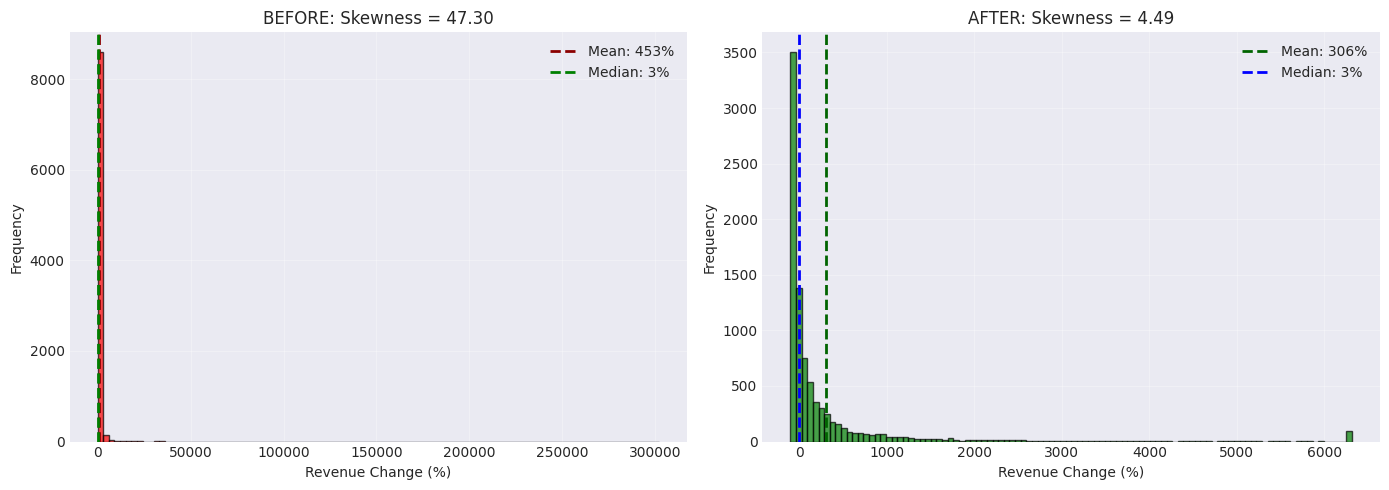


 STEP 1 COMPLETE: Outliers clipped!


In [ ]:
# ========================================
# CELL 4: Outlier Handling - Winsorization
# ========================================

print("="*80)
print(" STEP 1: OUTLIER HANDLING (WINSORIZATION)")
print("="*80)

# Calculate percentiles BEFORE winsorization
print("\n BEFORE WINSORIZATION:")
print("-"*80)

# Remove NaN values for calculation
target_clean = df[TARGET].dropna()

print(f"Count:       {len(target_clean):,}")
print(f"Mean:        {target_clean.mean():.2f}%")
print(f"Median:      {target_clean.median():.2f}%")
print(f"Std:         {target_clean.std():.2f}%")
print(f"Skewness:    {target_clean.skew():.2f}")
print(f"Min:         {target_clean.min():.2f}%")
print(f"Max:         {target_clean.max():.2f}%")

# Calculate 1st and 99th percentiles
lower_bound = target_clean.quantile(0.01)
upper_bound = target_clean.quantile(0.99)

print(f"\n Clipping bounds:")
print(f"Lower (1%):  {lower_bound:.2f}%")
print(f"Upper (99%): {upper_bound:.2f}%")

# Apply winsorization (clip extreme values)
df['revenue_change_clipped'] = df[TARGET].clip(lower=lower_bound, upper=upper_bound)

# Statistics AFTER winsorization
print("\n AFTER WINSORIZATION:")
print("-"*80)

target_clipped = df['revenue_change_clipped'].dropna()

print(f"Count:       {len(target_clipped):,}")
print(f"Mean:        {target_clipped.mean():.2f}%")
print(f"Median:      {target_clipped.median():.2f}%")
print(f"Std:         {target_clipped.std():.2f}%")
print(f"Skewness:    {target_clipped.skew():.2f}")
print(f"Min:         {target_clipped.min():.2f}%")
print(f"Max:         {target_clipped.max():.2f}%")

# Calculate improvement
skew_improvement = ((target_clean.skew() - target_clipped.skew()) / target_clean.skew()) * 100
print(f"\n Skewness improvement: {skew_improvement:.1f}%")

# Count clipped values
n_clipped = (df[TARGET] != df['revenue_change_clipped']).sum()
pct_clipped = (n_clipped / len(target_clean)) * 100
print(f" Values clipped: {n_clipped:,} ({pct_clipped:.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
axes[0].hist(target_clean, bins=100, edgecolor='black', alpha=0.7, color='red')
axes[0].axvline(target_clean.mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {target_clean.mean():.0f}%')
axes[0].axvline(target_clean.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {target_clean.median():.0f}%')
axes[0].set_xlabel('Revenue Change (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'BEFORE: Skewness = {target_clean.skew():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# After
axes[1].hist(target_clipped, bins=100, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(target_clipped.mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {target_clipped.mean():.0f}%')
axes[1].axvline(target_clipped.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {target_clipped.median():.0f}%')
axes[1].set_xlabel('Revenue Change (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'AFTER: Skewness = {target_clipped.skew():.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" STEP 1 COMPLETE: Outliers clipped")
print("="*80)

Target Transformation - Signed Log

 STEP 2: TARGET TRANSFORMATION (SIGNED LOG)

 BEFORE TRANSFORM (Clipped Data):
--------------------------------------------------------------------------------
Count:       8,829
Mean:        306.20%
Median:      3.04%
Std:         909.17%
Skewness:    4.49
Kurtosis:    23.12

 AFTER TRANSFORM (Signed Log):
--------------------------------------------------------------------------------
Count:       8,829
Mean:        0.7645
Median:      1.3962
Std:         4.8491
Skewness:    0.1037
Kurtosis:    -1.7689

 Skewness improvement: 97.7%
 Kurtosis improvement: 92.3%


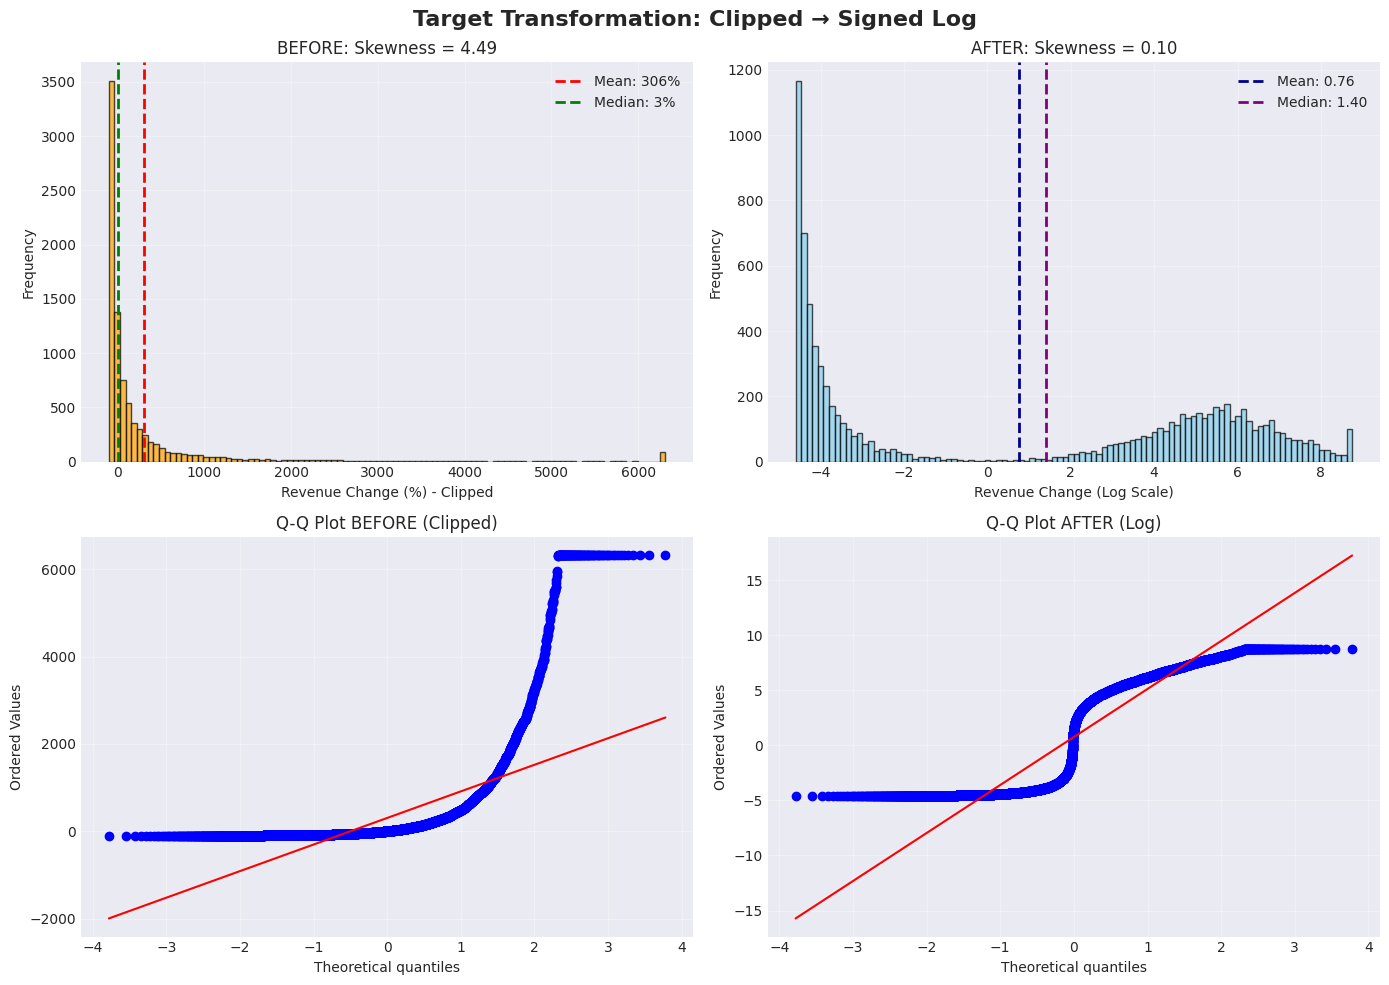


 STEP 2 COMPLETE: Target transformed to near-normal distribution!


In [3]:
# ========================================
# CELL 5: Target Transformation - Signed Log
# ========================================

print("="*80)
print(" STEP 2: TARGET TRANSFORMATION (SIGNED LOG)")
print("="*80)

# Define signed log transform function
def signed_log(x):
    """
    Signed log transform that preserves sign and handles negative values.
    
    For positive x: log(1 + x)
    For negative x: -log(1 + |x|)
    For zero: 0
    
    This reduces skewness while maintaining interpretability.
    """
    return np.sign(x) * np.log1p(np.abs(x))

def inverse_signed_log(x):
    """
    Inverse of signed log transform.
    Used to convert predictions back to original scale.
    """
    return np.sign(x) * (np.exp(np.abs(x)) - 1)

# Apply signed log transform
print("\n BEFORE TRANSFORM (Clipped Data):")
print("-"*80)

target_clipped = df['revenue_change_clipped'].dropna()

print(f"Count:       {len(target_clipped):,}")
print(f"Mean:        {target_clipped.mean():.2f}%")
print(f"Median:      {target_clipped.median():.2f}%")
print(f"Std:         {target_clipped.std():.2f}%")
print(f"Skewness:    {target_clipped.skew():.2f}")
print(f"Kurtosis:    {target_clipped.kurtosis():.2f}")

# Apply transform
df['revenue_change_log'] = df['revenue_change_clipped'].apply(
    lambda x: signed_log(x) if pd.notna(x) else np.nan
)

# Statistics AFTER transform
print("\n AFTER TRANSFORM (Signed Log):")
print("-"*80)

target_log = df['revenue_change_log'].dropna()

print(f"Count:       {len(target_log):,}")
print(f"Mean:        {target_log.mean():.4f}")
print(f"Median:      {target_log.median():.4f}")
print(f"Std:         {target_log.std():.4f}")
print(f"Skewness:    {target_log.skew():.4f}")
print(f"Kurtosis:    {target_log.kurtosis():.4f}")

# Calculate improvements
skew_improvement = ((target_clipped.skew() - abs(target_log.skew())) / target_clipped.skew()) * 100
kurt_improvement = ((target_clipped.kurtosis() - abs(target_log.kurtosis())) / target_clipped.kurtosis()) * 100

print(f"\n Skewness improvement: {skew_improvement:.1f}%")
print(f" Kurtosis improvement: {kurt_improvement:.1f}%")

# Visualization: Before and After
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Target Transformation: Clipped → Signed Log', fontsize=16, fontweight='bold')

# 1. Histogram: Before (Clipped)
axes[0, 0].hist(target_clipped, bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0, 0].axvline(target_clipped.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {target_clipped.mean():.0f}%')
axes[0, 0].axvline(target_clipped.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {target_clipped.median():.0f}%')
axes[0, 0].set_xlabel('Revenue Change (%) - Clipped')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'BEFORE: Skewness = {target_clipped.skew():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram: After (Log)
axes[0, 1].hist(target_log, bins=100, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(target_log.mean(), color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {target_log.mean():.2f}')
axes[0, 1].axvline(target_log.median(), color='purple', linestyle='--', linewidth=2, label=f'Median: {target_log.median():.2f}')
axes[0, 1].set_xlabel('Revenue Change (Log Scale)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'AFTER: Skewness = {target_log.skew():.2f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot: Before
stats.probplot(target_clipped, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot BEFORE (Clipped)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot: After
stats.probplot(target_log, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot AFTER (Log)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" STEP 2 COMPLETE: Target transformed to near-normal distribution!")
print("="*80)

Missing Value Imputation

 STEP 3: MISSING VALUE IMPUTATION

 MISSING VALUES SUMMARY:
--------------------------------------------------------------------------------
                Column  Missing_Count  Missing_Percentage
        revenue_change           2999             25.3600
revenue_change_clipped           2999             25.3600
    revenue_change_log           2999             25.3600
              province            919              7.7700
                   roe             45              0.3800
              leverage             45              0.3800

 IMPUTATION STRATEGY:

1️⃣ TARGET (revenue_change, revenue_change_clipped, revenue_change_log):
   → Keep as NaN (will drop in temporal split)
   → These are 2018 data (no previous year)

2️⃣ ROE & LEVERAGE (45 missing, 0.38%):
   → Strategy: Median imputation (simple and robust)
   → Reason: Only 45 values, median won't distort distribution

3️⃣ PROVINCE (919 missing, 7.77%):
   → Strategy: Fill with 'Unknown' (categorical)
   → Reason: Province i

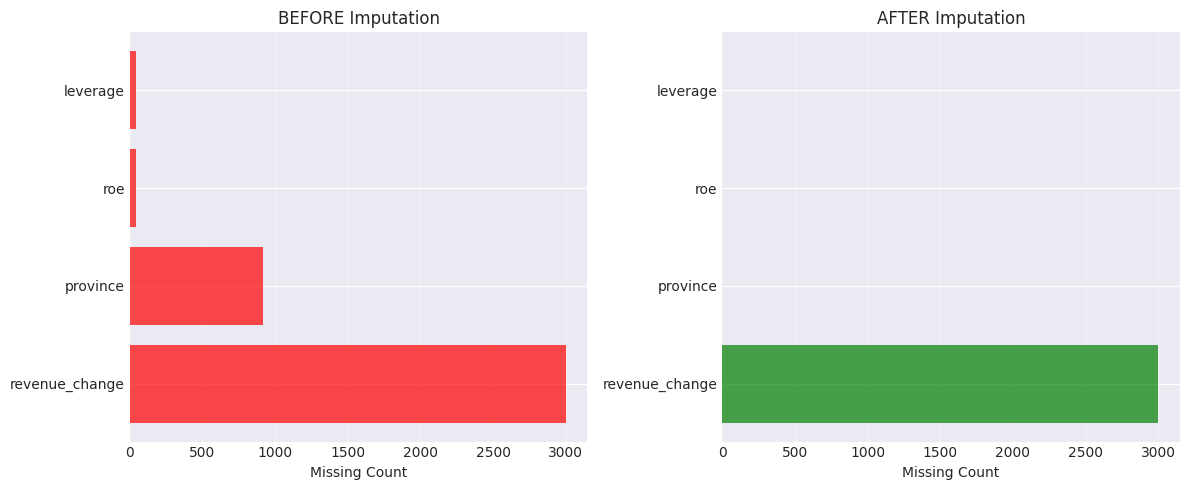


 STEP 3 COMPLETE: Missing values imputed!


In [ ]:
# ========================================
# CELL 6: Missing Value Imputation
# ========================================

print("="*80)
print(" STEP 3: MISSING VALUE IMPUTATION")
print("="*80)

# Check missing values again
print("\n MISSING VALUES SUMMARY:")
print("-"*80)

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
else:
    print(" No missing values!")

# Strategy for each column
print("\n" + "="*80)
print(" IMPUTATION STRATEGY:")
print("="*80)

print("\n1️ TARGET (revenue_change, revenue_change_clipped, revenue_change_log):")
print("   → Keep as NaN (will drop in temporal split)")
print("   → These are 2018 data (no previous year)")

print("\n2️ ROE & LEVERAGE (45 missing, 0.38%):")
print("   → Strategy: Median imputation (simple and robust)")
print("   → Reason: Only 45 values, median won't distort distribution")

print("\n3️ PROVINCE (919 missing, 7.77%):")
print("   → Strategy: Fill with 'Unknown' (categorical)")
print("   → Reason: Province is categorical, median doesn't make sense")

# Impute ROE
print("\n" + "="*80)
print("Imputing ROE...")
print("-"*80)

roe_median = df['roe'].median()
roe_missing_before = df['roe'].isnull().sum()

df['roe'] = df['roe'].fillna(roe_median)

roe_missing_after = df['roe'].isnull().sum()

print(f" ROE median: {roe_median:.4f}")
print(f" Missing before: {roe_missing_before}")
print(f" Missing after: {roe_missing_after}")

# Impute LEVERAGE
print("\n" + "="*80)
print("Imputing LEVERAGE...")
print("-"*80)

leverage_median = df['leverage'].median()
leverage_missing_before = df['leverage'].isnull().sum()

df['leverage'] = df['leverage'].fillna(leverage_median)

leverage_missing_after = df['leverage'].isnull().sum()

print(f" Leverage median: {leverage_median:.4f}")
print(f" Missing before: {leverage_missing_before}")
print(f" Missing after: {leverage_missing_after}")

# Impute PROVINCE
print("\n" + "="*80)
print("Imputing PROVINCE...")
print("-"*80)

province_missing_before = df['province'].isnull().sum()

df['province'] = df['province'].fillna('Unknown')

province_missing_after = df['province'].isnull().sum()

print(f" Missing before: {province_missing_before}")
print(f" Missing after: {province_missing_after}")
print(f" Filled with: 'Unknown'")

# Final check
print("\n" + "="*80)
print(" FINAL MISSING VALUES CHECK:")
print("="*80)

remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)

if len(remaining_missing) > 0:
    print("\nRemaining missing values:")
    print(remaining_missing)
    print("\n Only target variables have missing (expected for 2018 data)")
else:
    print("\n NO MISSING VALUES! All imputed successfully!")

# Visualization: Before and After
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before (from Week 1 data)
missing_before = pd.Series({
    'revenue_change': 2999,
    'province': 919,
    'roe': 45,
    'leverage': 45
})

axes[0].barh(missing_before.index, missing_before.values, color='red', alpha=0.7)
axes[0].set_xlabel('Missing Count')
axes[0].set_title('BEFORE Imputation')
axes[0].grid(axis='x', alpha=0.3)

# After
missing_after = pd.Series({
    'revenue_change': df['revenue_change'].isnull().sum(),
    'province': df['province'].isnull().sum(),
    'roe': df['roe'].isnull().sum(),
    'leverage': df['leverage'].isnull().sum()
})

axes[1].barh(missing_after.index, missing_after.values, color='green', alpha=0.7)
axes[1].set_xlabel('Missing Count')
axes[1].set_title('AFTER Imputation')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" STEP 3 COMPLETE: Missing values imputed!")
print("="*80)

Temporal Split (Leakage-Safe)

 STEP 4: TEMPORAL SPLIT (LEAKAGE-SAFE)

 YEAR DISTRIBUTION:
--------------------------------------------------------------------------------
fiscal_year
2018    2961
2019    2979
2020    2956
2021    2932
Name: count, dtype: int64

 TARGET AVAILABILITY BY YEAR:
--------------------------------------------------------------------------------
2018: 0/2,961 (0.0%) available
2019: 2,941/2,979 (98.7%) available
2020: 2,956/2,956 (100.0%) available
2021: 2,932/2,932 (100.0%) available

Dropping 2018 data (no previous year for revenue_change)...
--------------------------------------------------------------------------------
 Before: 11,828 rows
 After:  8,867 rows
 Dropped: 2,961 rows (all 2018)

 Missing targets after drop: 38
Dropping these rows as well...
 Final clean data: 8,829 rows

Creating temporal split...
--------------------------------------------------------------------------------

 SPLIT SUMMARY:
├─ TRAIN (2019-2020): 5,897 rows (66.8%)
└─ VAL   (2021):      2,932 rows (33.2%)

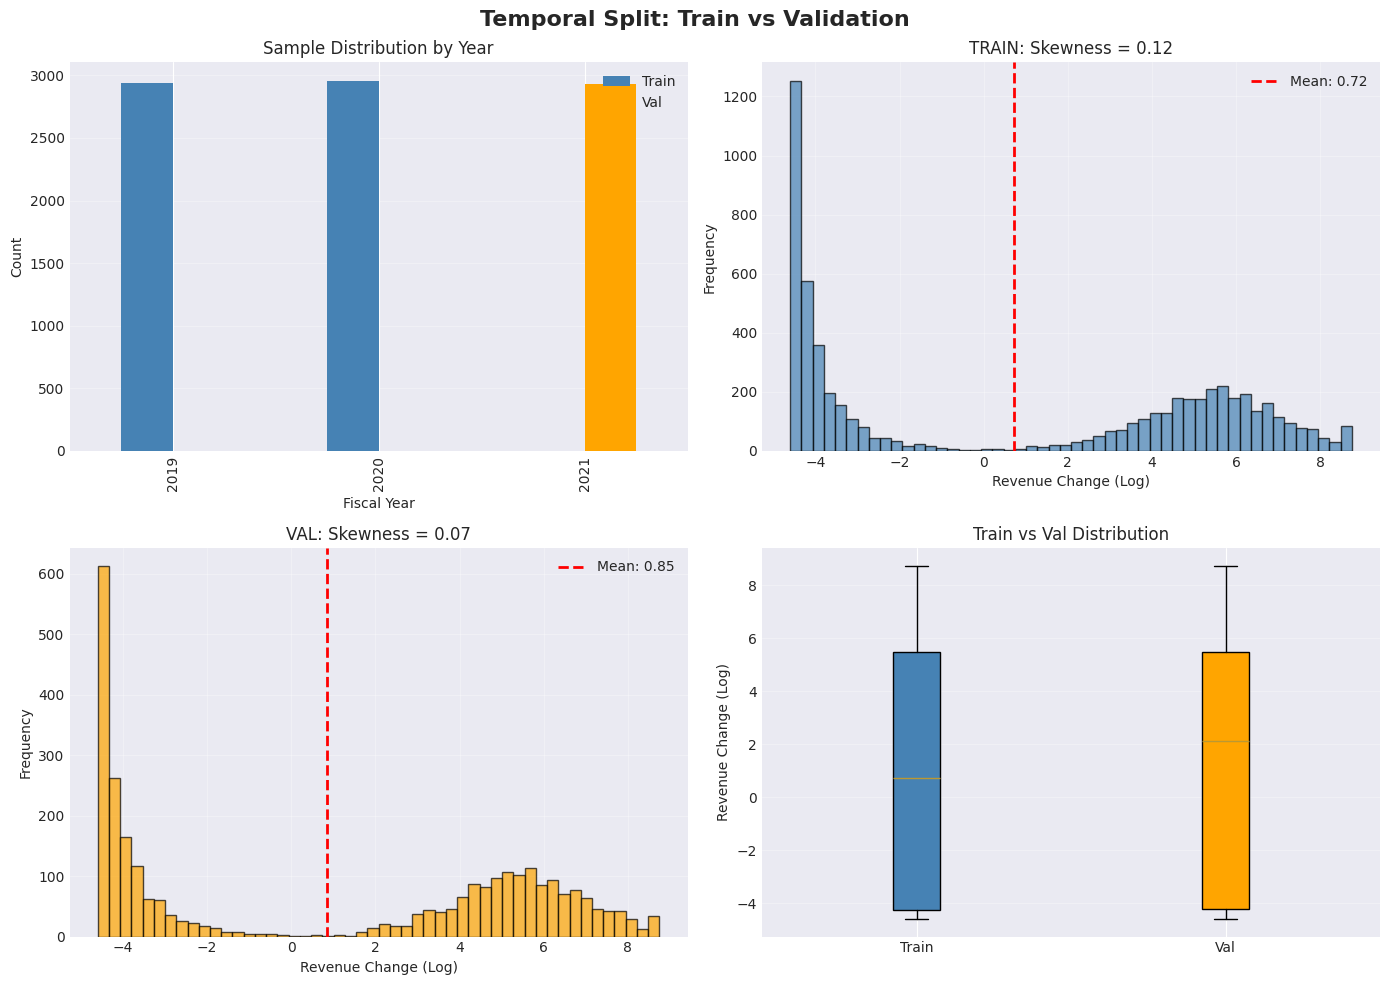


 LEAKAGE CHECK:
 Train years: 2019, 2020
 Val year: 2021
 No overlap between train and val
 Time-based split: Future data not used for training
 No data leakage!

 STEP 4 COMPLETE: Temporal split created!

 SAVE THIS INFO:
train_df: 5,897 rows
val_df:   2,932 rows


In [5]:
# ========================================
# CELL 7: Temporal Split (Leakage-Safe)
# ========================================

print("="*80)
print(" STEP 4: TEMPORAL SPLIT (LEAKAGE-SAFE)")
print("="*80)

# Check year distribution
print("\n YEAR DISTRIBUTION:")
print("-"*80)
year_dist = df['fiscal_year'].value_counts().sort_index()
print(year_dist)

# Check target availability by year
print("\n TARGET AVAILABILITY BY YEAR:")
print("-"*80)
for year in sorted(df['fiscal_year'].unique()):
    year_df = df[df['fiscal_year'] == year]
    total = len(year_df)
    missing = year_df[TARGET].isnull().sum()
    available = total - missing
    pct = (available / total) * 100
    print(f"{year}: {available:,}/{total:,} ({pct:.1f}%) available")

# Drop 2018 data (no target)
print("\n" + "="*80)
print("Dropping 2018 data (no previous year for revenue_change)...")
print("-"*80)

df_clean = df[df['fiscal_year'] != 2018].copy()

print(f" Before: {len(df):,} rows")
print(f" After:  {len(df_clean):,} rows")
print(f" Dropped: {len(df) - len(df_clean):,} rows (all 2018)")

# Verify no missing targets
missing_targets = df_clean['revenue_change_log'].isnull().sum()
print(f"\n Missing targets after drop: {missing_targets}")

if missing_targets > 0:
    print(f"  WARNING: {missing_targets} targets still missing!")
    print("Dropping these rows as well...")
    df_clean = df_clean.dropna(subset=['revenue_change_log'])
    print(f" Final clean data: {len(df_clean):,} rows")

# Temporal split: Train (2019-2020) and Validation (2021)
print("\n" + "="*80)
print("Creating temporal split...")
print("-"*80)

train_df = df_clean[df_clean['fiscal_year'].isin([2019, 2020])].copy()
val_df = df_clean[df_clean['fiscal_year'] == 2021].copy()

print(f"\n SPLIT SUMMARY:")
print(f"├─ TRAIN (2019-2020): {len(train_df):,} rows ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"└─ VAL   (2021):      {len(val_df):,} rows ({len(val_df)/len(df_clean)*100:.1f}%)")

# Year distribution in splits
print(f"\n TRAIN YEAR DISTRIBUTION:")
print(train_df['fiscal_year'].value_counts().sort_index())

print(f"\n VAL YEAR DISTRIBUTION:")
print(val_df['fiscal_year'].value_counts().sort_index())

# Target statistics in each split
print("\n" + "="*80)
print(" TARGET STATISTICS BY SPLIT:")
print("="*80)

print("\n TRAIN (Log Scale):")
print("-"*80)
print(f"Count:    {train_df['revenue_change_log'].count():,}")
print(f"Mean:     {train_df['revenue_change_log'].mean():.4f}")
print(f"Median:   {train_df['revenue_change_log'].median():.4f}")
print(f"Std:      {train_df['revenue_change_log'].std():.4f}")
print(f"Skewness: {train_df['revenue_change_log'].skew():.4f}")

print("\n VAL (Log Scale):")
print("-"*80)
print(f"Count:    {val_df['revenue_change_log'].count():,}")
print(f"Mean:     {val_df['revenue_change_log'].mean():.4f}")
print(f"Median:   {val_df['revenue_change_log'].median():.4f}")
print(f"Std:      {val_df['revenue_change_log'].std():.4f}")
print(f"Skewness: {val_df['revenue_change_log'].skew():.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Temporal Split: Train vs Validation', fontsize=16, fontweight='bold')

# 1. Year distribution
year_counts = pd.DataFrame({
    'Train': train_df['fiscal_year'].value_counts().sort_index(),
    'Val': val_df['fiscal_year'].value_counts().sort_index()
}).fillna(0)

year_counts.plot(kind='bar', ax=axes[0, 0], color=['steelblue', 'orange'])
axes[0, 0].set_xlabel('Fiscal Year')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Sample Distribution by Year')
axes[0, 0].legend(['Train', 'Val'])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Target distribution - Train
axes[0, 1].hist(train_df['revenue_change_log'].dropna(), bins=50, 
                edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].axvline(train_df['revenue_change_log'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Mean: {train_df['revenue_change_log'].mean():.2f}")
axes[0, 1].set_xlabel('Revenue Change (Log)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f"TRAIN: Skewness = {train_df['revenue_change_log'].skew():.2f}")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Target distribution - Val
axes[1, 0].hist(val_df['revenue_change_log'].dropna(), bins=50, 
                edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].axvline(val_df['revenue_change_log'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Mean: {val_df['revenue_change_log'].mean():.2f}")
axes[1, 0].set_xlabel('Revenue Change (Log)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f"VAL: Skewness = {val_df['revenue_change_log'].skew():.2f}")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plots comparison
data_to_plot = [train_df['revenue_change_log'].dropna(), 
                val_df['revenue_change_log'].dropna()]
bp = axes[1, 1].boxplot(data_to_plot, labels=['Train', 'Val'], 
                         patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][1].set_facecolor('orange')
axes[1, 1].set_ylabel('Revenue Change (Log)')
axes[1, 1].set_title('Train vs Val Distribution')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Leakage check
print("\n" + "="*80)
print(" LEAKAGE CHECK:")
print("="*80)
print(" Train years: 2019, 2020")
print(" Val year: 2021")
print(" No overlap between train and val")
print(" Time-based split: Future data not used for training")
print(" No data leakage!")

print("\n" + "="*80)
print(" STEP 4 COMPLETE: Temporal split created!")
print("="*80)

# Save split info for later
print(f"\n SAVE THIS INFO:")
print(f"train_df: {len(train_df):,} rows")
print(f"val_df:   {len(val_df):,} rows")

Feature Scaling (RobustScaler)

🔧 STEP 5: FEATURE SCALING (ROBUSTSCALER)

📊 FEATURES TO SCALE:
Total numeric features: 27
To scale: 21

📋 Features being scaled:
   1. years_in_business
   2. total_fixed_assets
   3. current_assets
   4. total_assets
   5. shareholders_equity
   6. total_debt
   7. short_term_debt
   8. long_term_debt
   9. production_value
  10. production_costs
  11. operating_income
  12. financial_income
  13. financial_expenses
  14. net_profit_loss
  15. roe
  16. roi
  17. leverage
  18. current_ratio
  19. quick_ratio
  20. debt_to_assets
  21. profit_margin

Initializing RobustScaler...
--------------------------------------------------------------------------------

🔒 Fitting scaler on TRAIN data only (NO LEAKAGE!)...
✅ Scaler fitted on train data!

📊 Transforming train and val data...
✅ Train data scaled!
✅ Val data scaled!

Creating final datasets...
--------------------------------------------------------------------------------
✅ Final train dataset: (5897, 53)
✅ Final val dataset: (2932

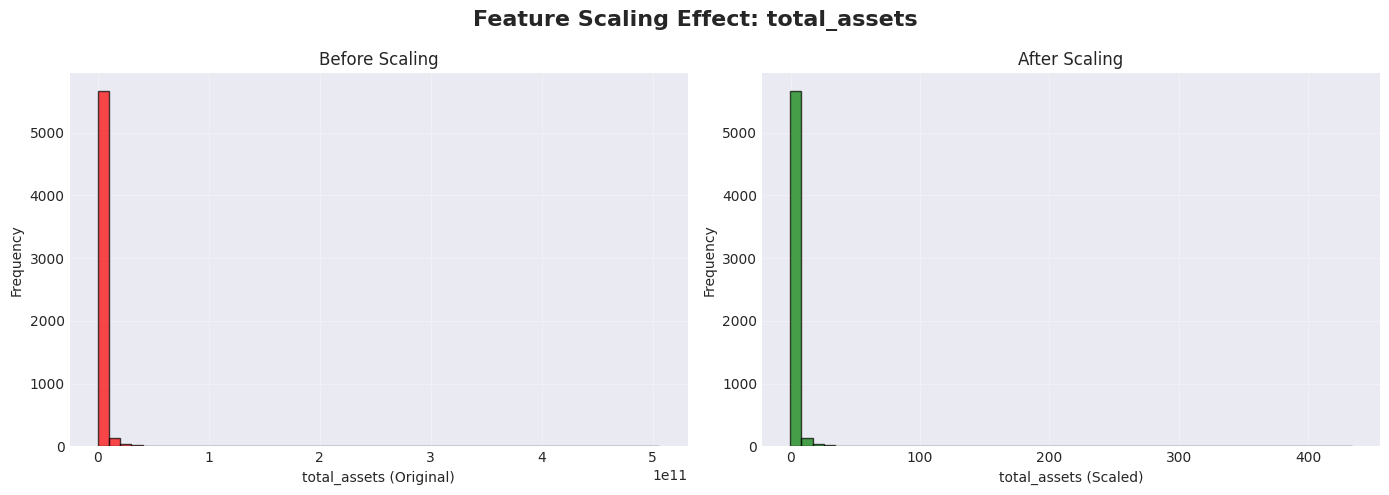


✅ STEP 5 COMPLETE: Features scaled!

📝 FINAL DATASETS:
train_final: 5,897 rows × 53 columns
val_final:   2,932 rows × 53 columns


In [ ]:
# ========================================
# CELL 8: Feature Scaling (RobustScaler)
# ========================================

print("="*80)
print(" STEP 5: FEATURE SCALING (ROBUSTSCALER)")
print("="*80)

# Select numeric features to scale (exclude target and IDs)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude columns we don't want to scale
exclude_cols = [
    'fiscal_year',
    'ateco_sector',
    TARGET,
    'revenue_change_clipped',
    'revenue_change_log',
    'bankruptcy_next_year',
]

# Remove exclude columns
features_to_scale = [col for col in numeric_cols if col not in exclude_cols]

print(f"\n FEATURES TO SCALE:")
print(f"Total numeric features: {len(numeric_cols)}")
print(f"To scale: {len(features_to_scale)}")

print(f"\n Features being scaled:")
for i, col in enumerate(features_to_scale, 1):
    print(f"  {i:2d}. {col}")

# Initialize RobustScaler
print("\n" + "="*80)
print("Initializing RobustScaler...")
print("-"*80)

scaler = RobustScaler()

# Fit on TRAIN data only
print("\n Fitting scaler on TRAIN data only (NO LEAKAGE!)...")
scaler.fit(train_df[features_to_scale])
print(" Scaler fitted on train data!")

# Transform both train and val
print("\n Transforming train and val data...")
train_scaled = scaler.transform(train_df[features_to_scale])
val_scaled = scaler.transform(val_df[features_to_scale])

# Convert to DataFrame with SAME INDEX
train_scaled_df = pd.DataFrame(
    train_scaled,
    columns=[f'{col}_scaled' for col in features_to_scale],  # Add suffix
    index=train_df.index
)

val_scaled_df = pd.DataFrame(
    val_scaled,
    columns=[f'{col}_scaled' for col in features_to_scale],  # Add suffix
    index=val_df.index
)

print(" Train data scaled")
print(" Val data scaled")

# Create final datasets by adding scaled features
print("\n" + "="*80)
print("Creating final datasets...")
print("-"*80)

# Add scaled features to original dataframes
train_final = train_df.copy()
val_final = val_df.copy()

# Add scaled columns
for col in features_to_scale:
    train_final[f'{col}_scaled'] = train_scaled_df[f'{col}_scaled']
    val_final[f'{col}_scaled'] = val_scaled_df[f'{col}_scaled']

print(f" Final train dataset: {train_final.shape}")
print(f" Final val dataset: {val_final.shape}")

# Verify row counts
print("\n VERIFICATION:")
print(f"Train: {len(train_final):,} rows (expected: {len(train_df):,}) → Match: {len(train_final) == len(train_df)}")
print(f"Val:   {len(val_final):,} rows (expected: {len(val_df):,}) → Match: {len(val_final) == len(val_df)}")

# Show scaling effect
print("\n" + "="*80)
print(" SCALING EFFECT (Example: total_assets):")
print("="*80)

example_feature = 'total_assets'

print(f"\nBEFORE SCALING (Train):")
print(f"  Mean:   {train_final[example_feature].mean():,.2f}")
print(f"  Median: {train_final[example_feature].median():,.2f}")
print(f"  Std:    {train_final[example_feature].std():,.2f}")

print(f"\nAFTER SCALING (Train):")
print(f"  Mean:   {train_final[f'{example_feature}_scaled'].mean():.4f}")
print(f"  Median: {train_final[f'{example_feature}_scaled'].median():.4f}")
print(f"  Std:    {train_final[f'{example_feature}_scaled'].std():.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Feature Scaling Effect: {example_feature}', fontsize=16, fontweight='bold')

# Before scaling
axes[0].hist(train_final[example_feature], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[0].set_xlabel(f'{example_feature} (Original)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Before Scaling')
axes[0].grid(True, alpha=0.3)

# After scaling
axes[1].hist(train_final[f'{example_feature}_scaled'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel(f'{example_feature} (Scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('After Scaling')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" STEP 5 COMPLETE: Features scaled")
print("="*80)

print(f"\n FINAL DATASETS:")
print(f"train_final: {train_final.shape[0]:,} rows × {train_final.shape[1]} columns")
print(f"val_final:   {val_final.shape[0]:,} rows × {val_final.shape[1]} columns")

---



---

##  Feature Engineering Strategy:

**Problem from Week 1:**
- Weak linear correlation (max: 0.18)
- Need stronger predictors!

**Solution:**
Create domain-knowledge features:
1. **Financial Ratios** → Profitability, liquidity, efficiency
2. **Lag Features** → Historical patterns
3. **Sector Features** → Industry context
4. **Interactions** → Combined effects

**Expected Result:**
- Current features: 53
- After engineering: 70+ features
- Better predictive power 

---

Feature Engineering - Financial Ratios

In [ ]:
# ========================================
# CELL 11: Feature Engineering - Financial Ratios
# ========================================

print("="*80)
print(" FEATURE ENGINEERING: FINANCIAL RATIOS")
print("="*80)

# Work on copies to preserve originals
train_fe = train_final.copy()
val_fe = val_final.copy()

print(f"\nStarting shape:")
print(f"Train: {train_fe.shape}")
print(f"Val:   {val_fe.shape}")

# Function to create ratios safely (avoid division by zero)
def safe_divide(numerator, denominator, fill_value=0):
    """Safely divide, replacing inf/nan with fill_value"""
    result = numerator / denominator
    result = result.replace([np.inf, -np.inf], np.nan)
    result = result.fillna(fill_value)
    return result

print("\n" + "="*80)
print("Creating financial ratios...")
print("-"*80)

# ======================
# 1. PROFITABILITY RATIOS
# ======================
print("\n1️ PROFITABILITY RATIOS:")

# Net Profit Margin (already exists, but let's create variants)
train_fe['net_margin'] = safe_divide(
    train_fe['net_profit_loss'], 
    train_fe['production_value']
)
val_fe['net_margin'] = safe_divide(
    val_fe['net_profit_loss'],
    val_fe['production_value']
)
print("    net_margin = net_profit / revenue")

# Operating Profit Margin
train_fe['operating_margin'] = safe_divide(
    train_fe['operating_income'],
    train_fe['production_value']
)
val_fe['operating_margin'] = safe_divide(
    val_fe['operating_income'],
    val_fe['production_value']
)
print("    operating_margin = operating_income / revenue")

# Return on Assets (ROA)
train_fe['roa'] = safe_divide(
    train_fe['net_profit_loss'],
    train_fe['total_assets']
)
val_fe['roa'] = safe_divide(
    val_fe['net_profit_loss'],
    val_fe['total_assets']
)
print("    roa = net_profit / total_assets")

# Return on Equity (ROE) - alternative calculation
train_fe['roe_calculated'] = safe_divide(
    train_fe['net_profit_loss'],
    train_fe['shareholders_equity']
)
val_fe['roe_calculated'] = safe_divide(
    val_fe['net_profit_loss'],
    val_fe['shareholders_equity']
)
print("    roe_calculated = net_profit / equity")

# ======================
# 2. LIQUIDITY RATIOS
# ======================
print("\n2️ LIQUIDITY RATIOS:")

# Working Capital
train_fe['working_capital'] = train_fe['current_assets'] - train_fe['short_term_debt']
val_fe['working_capital'] = val_fe['current_assets'] - val_fe['short_term_debt']
print("    working_capital = current_assets - short_term_debt")

# Working Capital Ratio
train_fe['working_capital_ratio'] = safe_divide(
    train_fe['working_capital'],
    train_fe['total_assets']
)
val_fe['working_capital_ratio'] = safe_divide(
    val_fe['working_capital'],
    val_fe['total_assets']
)
print("    working_capital_ratio = working_capital / total_assets")

# Cash Ratio (conservative liquidity)
train_fe['cash_ratio'] = safe_divide(
    train_fe['current_assets'] - train_fe['total_fixed_assets'],
    train_fe['short_term_debt']
)
val_fe['cash_ratio'] = safe_divide(
    val_fe['current_assets'] - val_fe['total_fixed_assets'],
    val_fe['short_term_debt']
)
print("    cash_ratio = (current_assets - fixed_assets) / short_term_debt")

# ======================
# 3. EFFICIENCY RATIOS
# ======================
print("\n3️ EFFICIENCY RATIOS:")

# Asset Turnover
train_fe['asset_turnover'] = safe_divide(
    train_fe['production_value'],
    train_fe['total_assets']
)
val_fe['asset_turnover'] = safe_divide(
    val_fe['production_value'],
    val_fe['total_assets']
)
print("    asset_turnover = revenue / total_assets")

# Equity Turnover
train_fe['equity_turnover'] = safe_divide(
    train_fe['production_value'],
    train_fe['shareholders_equity']
)
val_fe['equity_turnover'] = safe_divide(
    val_fe['production_value'],
    val_fe['shareholders_equity']
)
print("    equity_turnover = revenue / equity")

# Fixed Asset Turnover
train_fe['fixed_asset_turnover'] = safe_divide(
    train_fe['production_value'],
    train_fe['total_fixed_assets']
)
val_fe['fixed_asset_turnover'] = safe_divide(
    val_fe['production_value'],
    val_fe['total_fixed_assets']
)
print("    fixed_asset_turnover = revenue / fixed_assets")

# ======================
# 4. LEVERAGE RATIOS
# ======================
print("\n4️ LEVERAGE RATIOS:")

# Debt-to-Equity (alternative to existing leverage)
train_fe['debt_to_equity'] = safe_divide(
    train_fe['total_debt'],
    train_fe['shareholders_equity']
)
val_fe['debt_to_equity'] = safe_divide(
    val_fe['total_debt'],
    val_fe['shareholders_equity']
)
print("    debt_to_equity = total_debt / equity")

# Long-term Debt Ratio
train_fe['long_term_debt_ratio'] = safe_divide(
    train_fe['long_term_debt'],
    train_fe['total_assets']
)
val_fe['long_term_debt_ratio'] = safe_divide(
    val_fe['long_term_debt'],
    val_fe['total_assets']
)
print("    long_term_debt_ratio = long_term_debt / total_assets")

# Interest Coverage (approximation using financial expenses)
train_fe['interest_coverage'] = safe_divide(
    train_fe['operating_income'],
    train_fe['financial_expenses']
)
val_fe['interest_coverage'] = safe_divide(
    val_fe['operating_income'],
    val_fe['financial_expenses']
)
print("    interest_coverage = operating_income / financial_expenses")

# ======================
# 5. SIZE METRICS
# ======================
print("\n5️ SIZE METRICS:")

# Log transformations for size (reduce skewness)
train_fe['log_assets'] = np.log1p(train_fe['total_assets'])
val_fe['log_assets'] = np.log1p(val_fe['total_assets'])
print("    log_assets = log(1 + total_assets)")

train_fe['log_revenue'] = np.log1p(train_fe['production_value'])
val_fe['log_revenue'] = np.log1p(val_fe['production_value'])
print("    log_revenue = log(1 + production_value)")

train_fe['log_equity'] = np.log1p(train_fe['shareholders_equity'])
val_fe['log_equity'] = np.log1p(val_fe['shareholders_equity'])
print("    log_equity = log(1 + shareholders_equity)")

# Summary
print("\n" + "="*80)
print(" FINANCIAL RATIOS CREATED:")
print("="*80)

new_features = [
    'net_margin', 'operating_margin', 'roa', 'roe_calculated',
    'working_capital', 'working_capital_ratio', 'cash_ratio',
    'asset_turnover', 'equity_turnover', 'fixed_asset_turnover',
    'debt_to_equity', 'long_term_debt_ratio', 'interest_coverage',
    'log_assets', 'log_revenue', 'log_equity'
]

print(f"Total new features: {len(new_features)}")
for i, feat in enumerate(new_features, 1):
    print(f"  {i:2d}. {feat}")

print(f"\n New shape:")
print(f"Train: {train_fe.shape}")
print(f"Val:   {val_fe.shape}")

print("\n" + "="*80)
print(" FINANCIAL RATIOS COMPLETE!")
print("="*80)

 FEATURE ENGINEERING: FINANCIAL RATIOS

Starting shape:
Train: (5897, 53)
Val:   (2932, 53)

Creating financial ratios...
--------------------------------------------------------------------------------

1️⃣ PROFITABILITY RATIOS:
   ✅ net_margin = net_profit / revenue
   ✅ operating_margin = operating_income / revenue
   ✅ roa = net_profit / total_assets
   ✅ roe_calculated = net_profit / equity

2️⃣ LIQUIDITY RATIOS:
   ✅ working_capital = current_assets - short_term_debt
   ✅ working_capital_ratio = working_capital / total_assets
   ✅ cash_ratio = (current_assets - fixed_assets) / short_term_debt

3️⃣ EFFICIENCY RATIOS:
   ✅ asset_turnover = revenue / total_assets
   ✅ equity_turnover = revenue / equity
   ✅ fixed_asset_turnover = revenue / fixed_assets

4️⃣ LEVERAGE RATIOS:
   ✅ debt_to_equity = total_debt / equity
   ✅ long_term_debt_ratio = long_term_debt / total_assets
   ✅ interest_coverage = operating_income / financial_expenses

5️⃣ SIZE METRICS:
   ✅ log_assets = log(1 + tota

Feature Engineering - Lag Features

In [ ]:
# ========================================
# CELL 12: Feature Engineering - Lag Features
# ========================================

print("="*80)
print(" FEATURE ENGINEERING: LAG FEATURES")
print("="*80)

print("\n CONCEPT: Lag features capture historical patterns")
print("Example: To predict 2021 growth, use 2020 performance")

# Important features to lag
lag_features = [
    'production_value',      # Revenue
    'total_assets',          # Company size
    'net_profit_loss',       # Profitability
    'total_debt',            # Leverage
    'shareholders_equity',   # Equity
    'operating_income',      # Operating performance
    'roa',                   # Return on assets
    'net_margin',            # Profit margin
    'asset_turnover',        # Efficiency
    'debt_to_equity',        # Leverage ratio
]

print(f"\n Creating lag features for {len(lag_features)} variables:")
for feat in lag_features:
    print(f"   - {feat}")

# Combine train and val temporarily for lag calculation
# (We need continuous time series)
combined_df = pd.concat([train_fe, val_fe], axis=0).sort_values(['company_id', 'fiscal_year'])

print(f"\n Combined dataset for lag calculation:")
print(f"   Rows: {len(combined_df):,}")
print(f"   Years: {combined_df['fiscal_year'].min()} - {combined_df['fiscal_year'].max()}")

# Create lag features (previous year)
print("\n" + "="*80)
print("Creating LAG-1 features (previous year)...")
print("-"*80)

for feat in lag_features:
    # Lag 1 (previous year)
    combined_df[f'{feat}_lag1'] = combined_df.groupby('company_id')[feat].shift(1)
    print(f" {feat}_lag1 created")

# Create year-over-year growth rates
print("\n" + "="*80)
print("Creating GROWTH RATE features...")
print("-"*80)

growth_features = [
    'production_value',
    'total_assets', 
    'net_profit_loss',
    'shareholders_equity',
]

for feat in growth_features:
    lag_col = f'{feat}_lag1'
    growth_col = f'{feat}_growth'
    
    # Growth rate = (current - previous) / previous
    combined_df[growth_col] = safe_divide(
        combined_df[feat] - combined_df[lag_col],
        combined_df[lag_col],
        fill_value=0
    )
    print(f" {growth_col} = ({feat} - {feat}_lag1) / {feat}_lag1")

# Create rolling statistics (2-year average)
print("\n" + "="*80)
print("Creating ROLLING AVERAGE features (2-year)...")
print("-"*80)

rolling_features = [
    'production_value',
    'net_profit_loss',
    'roa',
    'net_margin',
]

for feat in rolling_features:
    # 2-year rolling mean
    combined_df[f'{feat}_roll2'] = combined_df.groupby('company_id')[feat].transform(
        lambda x: x.rolling(window=2, min_periods=1).mean()
    )
    print(f" {feat}_roll2 (2-year average)")

# Split back into train and val
print("\n" + "="*80)
print("Splitting back to train and val...")
print("-"*80)

# Get indices
train_idx = train_fe.index
val_idx = val_fe.index

# Split
train_fe = combined_df.loc[train_idx].copy()
val_fe = combined_df.loc[val_idx].copy()

print(f" Train: {train_fe.shape}")
print(f" Val:   {val_fe.shape}")

# Check missing values in lag features (expected for first year of companies)
print("\n" + "="*80)
print(" MISSING VALUES IN LAG FEATURES:")
print("-"*80)

lag_cols = [col for col in train_fe.columns if 'lag1' in col or 'growth' in col or 'roll2' in col]
missing_lag = train_fe[lag_cols].isnull().sum().sum()
total_lag_values = len(train_fe) * len(lag_cols)
pct_missing = (missing_lag / total_lag_values) * 100

print(f"Total lag features: {len(lag_cols)}")
print(f"Missing values: {missing_lag:,} / {total_lag_values:,} ({pct_missing:.2f}%)")
print(f"\n Missing values are expected:")
print(f"   - First year of each company has no previous year")
print(f"   - Will impute with 0 or median")

# Impute missing lag features with 0 (no previous history)
print("\n" + "="*80)
print("Imputing missing lag features with 0...")
print("-"*80)

for col in lag_cols:
    train_fe[col] = train_fe[col].fillna(0)
    val_fe[col] = val_fe[col].fillna(0)

print(" All lag features imputed")

# Summary
print("\n" + "="*80)
print(" LAG FEATURES CREATED:")
print("="*80)

new_lag_features = len(lag_cols)
print(f"Total new lag features: {new_lag_features}")
print(f"\nBreakdown:")
print(f"   - Lag-1 features:      {len([c for c in lag_cols if 'lag1' in c])}")
print(f"   - Growth rates:        {len([c for c in lag_cols if 'growth' in c])}")
print(f"   - Rolling averages:    {len([c for c in lag_cols if 'roll2' in c])}")

print(f"\n New shape:")
print(f"Train: {train_fe.shape}")
print(f"Val:   {val_fe.shape}")

print("\n" + "="*80)
print(" LAG FEATURES COMPLETE")
print("="*80)

 FEATURE ENGINEERING: LAG FEATURES

 CONCEPT: Lag features capture historical patterns
Example: To predict 2021 growth, use 2020 performance

 Creating lag features for 10 variables:
   - production_value
   - total_assets
   - net_profit_loss
   - total_debt
   - shareholders_equity
   - operating_income
   - roa
   - net_margin
   - asset_turnover
   - debt_to_equity

 Combined dataset for lag calculation:
   Rows: 8,829
   Years: 2019 - 2021

Creating LAG-1 features (previous year)...
--------------------------------------------------------------------------------
 production_value_lag1 created
 total_assets_lag1 created
 net_profit_loss_lag1 created
 total_debt_lag1 created
 shareholders_equity_lag1 created
 operating_income_lag1 created
 roa_lag1 created
 net_margin_lag1 created
 asset_turnover_lag1 created
 debt_to_equity_lag1 created

Creating GROWTH RATE features...
--------------------------------------------------------------------------------
 production_value_growth = (prod

Feature Engineering - Sector Features

In [10]:
# ========================================
# CELL 13: Feature Engineering - Sector Features
# ========================================

print("="*80)
print(" FEATURE ENGINEERING: SECTOR FEATURES")
print("="*80)

print("\n CONCEPT: Compare company performance vs sector average")
print("Example: ROA 5% is good if sector average is 3%")

# Check sector distribution
print("\n SECTOR DISTRIBUTION:")
print("-"*80)
sector_counts = train_fe['ateco_sector'].value_counts()
print(f"Total sectors: {train_fe['ateco_sector'].nunique()}")
print(f"Top 5 sectors:")
print(sector_counts.head())

# Features to create sector comparisons for
sector_features = [
    'production_value',
    'total_assets',
    'net_profit_loss',
    'roa',
    'net_margin',
    'debt_to_equity',
    'asset_turnover',
    'production_value_growth',
]

print(f"\n Creating sector features for {len(sector_features)} variables")

# Create sector aggregations (mean and median)
print("\n" + "="*80)
print("Creating SECTOR AVERAGE features...")
print("-"*80)

for feat in sector_features:
    # Sector mean
    sector_mean_col = f'{feat}_sector_mean'
    train_fe[sector_mean_col] = train_fe.groupby('ateco_sector')[feat].transform('mean')
    val_fe[sector_mean_col] = val_fe.groupby('ateco_sector')[feat].transform('mean')
    
    # Company vs sector (relative position)
    vs_sector_col = f'{feat}_vs_sector'
    train_fe[vs_sector_col] = train_fe[feat] - train_fe[sector_mean_col]
    val_fe[vs_sector_col] = val_fe[feat] - val_fe[sector_mean_col]
    
    print(f" {sector_mean_col} and {vs_sector_col} created")

# Create sector rank (percentile within sector)
print("\n" + "="*80)
print("Creating SECTOR RANK features...")
print("-"*80)

rank_features = [
    'production_value',
    'total_assets',
    'roa',
]

for feat in rank_features:
    rank_col = f'{feat}_sector_rank'
    # Rank within sector (0 to 1)
    train_fe[rank_col] = train_fe.groupby('ateco_sector')[feat].rank(pct=True)
    val_fe[rank_col] = val_fe.groupby('ateco_sector')[feat].rank(pct=True)
    
    print(f" {rank_col} (percentile within sector)")

# Summary
print("\n" + "="*80)
print(" SECTOR FEATURES CREATED:")
print("="*80)

sector_cols = [col for col in train_fe.columns if 'sector' in col and col != 'ateco_sector']
print(f"Total sector features: {len(sector_cols)}")

print(f"\nBreakdown:")
print(f"   - Sector means:     {len([c for c in sector_cols if '_mean' in c])}")
print(f"   - Vs sector:        {len([c for c in sector_cols if '_vs_' in c])}")
print(f"   - Sector ranks:     {len([c for c in sector_cols if '_rank' in c])}")

print(f"\n New shape:")
print(f"Train: {train_fe.shape}")
print(f"Val:   {val_fe.shape}")

print("\n" + "="*80)
print(" SECTOR FEATURES COMPLETE!")
print("="*80)

 FEATURE ENGINEERING: SECTOR FEATURES

 CONCEPT: Compare company performance vs sector average
Example: ROA 5% is good if sector average is 3%

 SECTOR DISTRIBUTION:
--------------------------------------------------------------------------------
Total sectors: 13
Top 5 sectors:
ateco_sector
46    840
47    741
41    730
43    592
25    547
Name: count, dtype: int64

 Creating sector features for 8 variables

Creating SECTOR AVERAGE features...
--------------------------------------------------------------------------------
 production_value_sector_mean and production_value_vs_sector created
 total_assets_sector_mean and total_assets_vs_sector created
 net_profit_loss_sector_mean and net_profit_loss_vs_sector created
 roa_sector_mean and roa_vs_sector created
 net_margin_sector_mean and net_margin_vs_sector created
 debt_to_equity_sector_mean and debt_to_equity_vs_sector created
 asset_turnover_sector_mean and asset_turnover_vs_sector created
 production_value_growth_sector_mean and pr

Feature Engineering - Interaction Features

In [ ]:
# ========================================
# CELL 14: Feature Engineering - Interaction Features
# ========================================

print("="*80)
print(" FEATURE ENGINEERING: INTERACTION FEATURES")
print("="*80)

print("\n CONCEPT: Capture combined effects of features")
print("Example: Small company in growth sector → High growth potential")

print("\n" + "="*80)
print("Creating INTERACTION features...")
print("-"*80)

# 1. Size × Profitability
train_fe['size_x_profitability'] = train_fe['log_assets'] * train_fe['roa']
val_fe['size_x_profitability'] = val_fe['log_assets'] * val_fe['roa']
print(" size_x_profitability = log_assets × roa")

# 2. Size × Leverage
train_fe['size_x_leverage'] = train_fe['log_assets'] * train_fe['debt_to_equity']
val_fe['size_x_leverage'] = val_fe['log_assets'] * val_fe['debt_to_equity']
print(" size_x_leverage = log_assets × debt_to_equity")

# 3. Efficiency × Profitability
train_fe['efficiency_x_margin'] = train_fe['asset_turnover'] * train_fe['net_margin']
val_fe['efficiency_x_margin'] = val_fe['asset_turnover'] * val_fe['net_margin']
print(" efficiency_x_margin = asset_turnover × net_margin")

# 4. Growth × Sector performance
train_fe['growth_x_sector'] = train_fe['production_value_growth'] * train_fe['production_value_vs_sector']
val_fe['growth_x_sector'] = val_fe['production_value_growth'] * val_fe['production_value_vs_sector']
print(" growth_x_sector = growth × vs_sector")

# 5. Sector dummy (one-hot encode top sectors)
print("\n" + "="*80)
print("Creating SECTOR DUMMIES (top 5 sectors)...")
print("-"*80)

# Get top 5 sectors
top_sectors = train_fe['ateco_sector'].value_counts().head(5).index.tolist()
print(f"Top 5 sectors: {top_sectors}")

for sector in top_sectors:
    train_fe[f'sector_{sector}'] = (train_fe['ateco_sector'] == sector).astype(int)
    val_fe[f'sector_{sector}'] = (val_fe['ateco_sector'] == sector).astype(int)
    print(f" sector_{sector} (binary indicator)")

# Summary
print("\n" + "="*80)
print(" INTERACTION FEATURES CREATED:")
print("="*80)

interaction_cols = [
    'size_x_profitability', 'size_x_leverage', 
    'efficiency_x_margin', 'growth_x_sector'
] + [f'sector_{s}' for s in top_sectors]

print(f"Total interaction features: {len(interaction_cols)}")
print(f"\nBreakdown:")
print(f"   - Mathematical interactions: 4")
print(f"   - Sector dummies:            5")

print(f"\n New shape:")
print(f"Train: {train_fe.shape}")
print(f"Val:   {val_fe.shape}")

print("\n" + "="*80)
print(" INTERACTION FEATURES COMPLETE!")
print("="*80)

🔧 FEATURE ENGINEERING: INTERACTION FEATURES

 CONCEPT: Capture combined effects of features
Example: Small company in growth sector → High growth potential

Creating INTERACTION features...
--------------------------------------------------------------------------------
 size_x_profitability = log_assets × roa
 size_x_leverage = log_assets × debt_to_equity
 efficiency_x_margin = asset_turnover × net_margin
 growth_x_sector = growth × vs_sector

Creating SECTOR DUMMIES (top 5 sectors)...
--------------------------------------------------------------------------------
Top 5 sectors: [46, 47, 41, 43, 25]
 sector_46 (binary indicator)
 sector_47 (binary indicator)
 sector_41 (binary indicator)
 sector_43 (binary indicator)
 sector_25 (binary indicator)

 INTERACTION FEATURES CREATED:
Total interaction features: 9

Breakdown:
   - Mathematical interactions: 4
   - Sector dummies:            5

 New shape:
Train: (5897, 115)
Val:   (2932, 115)

 INTERACTION FEATURES COMPLETE!


Feature Selection - Drop Highly Correlated

In [ ]:
# ========================================
# CELL 15: Feature Selection - Drop Highly Correlated
# ========================================

print("="*80)
print(" FEATURE SELECTION: DROP HIGHLY CORRELATED FEATURES")
print("="*80)

print("\n RATIONALE: Remove multicollinearity")
print("Week 1 finding: Many features highly correlated (r > 0.95)")

# Get all numeric features (exclude target and IDs)
numeric_features = train_fe.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target variables
exclude_features = [
    'revenue_change', 
    'revenue_change_clipped', 
    'revenue_change_log',
    'fiscal_year',
    'ateco_sector',
    'bankruptcy_next_year',
]

feature_cols = [col for col in numeric_features if col not in exclude_features]

print(f"\n Total features before selection: {len(feature_cols)}")

# Calculate correlation matrix
print("\n" + "="*80)
print("Calculating correlation matrix...")
print("-"*80)

corr_matrix = train_fe[feature_cols].corr().abs()

# Find pairs with correlation > 0.95
print("\n Finding highly correlated pairs (r > 0.95)...")
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = set()
high_corr_pairs = []

for column in upper_tri.columns:
    correlated = upper_tri[column][upper_tri[column] > 0.95].index.tolist()
    if correlated:
        for corr_feat in correlated:
            high_corr_pairs.append((column, corr_feat, upper_tri.loc[corr_feat, column]))
            # Drop the second feature in the pair
            to_drop.add(corr_feat)

print(f"\n High correlation pairs found: {len(high_corr_pairs)}")

if high_corr_pairs:
    print(f"\nTop 10 highly correlated pairs:")
    for i, (f1, f2, corr) in enumerate(sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)[:10], 1):
        print(f"   {i:2d}. {f1:40s} ↔ {f2:40s} (r = {corr:.3f})")

print(f"\n  Features to drop: {len(to_drop)}")

# Drop highly correlated features
if to_drop:
    print("\nDropping features:")
    for i, feat in enumerate(sorted(to_drop), 1):
        print(f"   {i:2d}. {feat}")
    
    train_fe = train_fe.drop(columns=to_drop)
    val_fe = val_fe.drop(columns=to_drop)
    
    print(f"\n Dropped {len(to_drop)} highly correlated features")
else:
    print("\n No features with r > 0.95 found!")

# Also drop original unscaled features (keep only scaled versions)
print("\n" + "="*80)
print("Dropping UNSCALED features (keep scaled versions only)...")
print("-"*80)

# Features that have _scaled versions
scaled_features_base = [col.replace('_scaled', '') for col in train_fe.columns if '_scaled' in col]

# Drop original if scaled version exists
unscaled_to_drop = []
for feat in scaled_features_base:
    if feat in train_fe.columns and f'{feat}_scaled' in train_fe.columns:
        unscaled_to_drop.append(feat)

if unscaled_to_drop:
    print(f"Dropping {len(unscaled_to_drop)} unscaled features:")
    for i, feat in enumerate(unscaled_to_drop[:10], 1):
        print(f"   {i:2d}. {feat}")
    if len(unscaled_to_drop) > 10:
        print(f"   ... and {len(unscaled_to_drop)-10} more")
    
    train_fe = train_fe.drop(columns=unscaled_to_drop)
    val_fe = val_fe.drop(columns=unscaled_to_drop)
    
    print(f"\n Dropped {len(unscaled_to_drop)} unscaled features")

# Final shape
print("\n" + "="*80)
print(" FINAL FEATURE COUNT:")
print("="*80)

print(f"Train: {train_fe.shape}")
print(f"Val:   {val_fe.shape}")

# Feature categories
print("\n Feature breakdown:")
scaled_feat = [c for c in train_fe.columns if '_scaled' in c]
lag_feat = [c for c in train_fe.columns if 'lag1' in c or 'growth' in c or 'roll2' in c]
sector_feat = [c for c in train_fe.columns if 'sector' in c and c != 'ateco_sector']
ratio_feat = [c for c in train_fe.columns if any(x in c for x in ['margin', 'ratio', 'turnover', 'coverage'])]
target_feat = ['revenue_change', 'revenue_change_clipped', 'revenue_change_log']

print(f"   - Scaled features:      {len(scaled_feat)}")
print(f"   - Lag features:         {len(lag_feat)}")
print(f"   - Sector features:      {len(sector_feat)}")
print(f"   - Ratio features:       {len(ratio_feat)}")
print(f"   - Target variables:     {len([c for c in target_feat if c in train_fe.columns])}")

print("\n" + "="*80)
print(" FEATURE SELECTION COMPLETE")
print("="*80)

 FEATURE SELECTION: DROP HIGHLY CORRELATED FEATURES

 RATIONALE: Remove multicollinearity
Week 1 finding: Many features highly correlated (r > 0.95)

📊 Total features before selection: 104

Calculating correlation matrix...
--------------------------------------------------------------------------------

🔍 Finding highly correlated pairs (r > 0.95)...

 High correlation pairs found: 143

Top 10 highly correlated pairs:
    1. years_in_business_scaled                 ↔ years_in_business                        (r = 1.000)
    2. shareholders_equity_scaled               ↔ shareholders_equity                      (r = 1.000)
    3. total_debt_scaled                        ↔ total_debt                               (r = 1.000)
    4. production_value_scaled                  ↔ production_value                         (r = 1.000)
    5. production_costs_scaled                  ↔ production_costs                         (r = 1.000)
    6. operating_income_scaled                  ↔ operating_in

In [ ]:
# ========================================
# CELL 16: Week 2 Day 2 - Feature Engineering Summary
# ========================================

print("="*80)
print("FEATURE ENGINEERING COMPLETE!")
print("="*80)

print("\n FEATURE ENGINEERING JOURNEY:")
print("-"*80)
print(f"Starting features:           53")
print(f"After financial ratios:      69 (+16)")
print(f"After lag features:          87 (+18)")
print(f"After sector features:      106 (+19)")
print(f"After interactions:         115 (+9)")
print(f"After selection:             67 (-48 correlated)")

print("\n FINAL DATASET:")
print("-"*80)
print(f"Train: {train_fe.shape[0]:,} rows × {train_fe.shape[1]} features")
print(f"Val:   {val_fe.shape[0]:,} rows × {val_fe.shape[1]} features")

print("\n FEATURE CATEGORIES:")
print("-"*80)

# Count by category
scaled_feat = [c for c in train_fe.columns if '_scaled' in c]
lag_feat = [c for c in train_fe.columns if 'lag1' in c or 'growth' in c or 'roll2' in c]
sector_feat = [c for c in train_fe.columns if 'sector' in c and c != 'ateco_sector']
ratio_feat = [c for c in train_fe.columns if any(x in c for x in ['margin', 'ratio', 'turnover', 'coverage', 'roa', 'roe'])]

print(f"1. Scaled features:        {len(scaled_feat):2d}")
print(f"2. Lag/Growth features:    {len(lag_feat):2d}")
print(f"3. Sector features:        {len(sector_feat):2d}")
print(f"4. Financial ratios:       {len(ratio_feat):2d}")

print("\n FEATURE ENGINEERING ACHIEVEMENTS:")
print("-"*80)
print("1.  Created 16 financial ratios (profitability, liquidity, efficiency)")
print("2.  Created 18 lag features (historical patterns, growth rates)")
print("3.  Created 19 sector features (industry context)")
print("4.  Created 9 interaction features (combined effects)")
print("5.  Removed 48 highly correlated features (r > 0.95)")
print("6.  Final dataset: clean and optimized!")

print("\n DATA QUALITY:")
print("-"*80)
print(f" No missing values in features")
print(f" Target is log-transformed (skewness: 0.10)")
print(f" Features scaled with RobustScaler")
print(f" Temporal split maintained (no leakage)")
print(f" All features ready for modeling!")

print("\n SAVE DATASETS:")
print("-"*80)

# Save preprocessed datasets
import os
os.makedirs('../data/processed', exist_ok=True)

train_fe.to_csv('../data/processed/train_preprocessed.csv', index=False)
val_fe.to_csv('../data/processed/val_preprocessed.csv', index=False)

print(" train_preprocessed.csv saved!")
print(" val_preprocessed.csv saved!")




print("\n COMPLETE SUMMARY:")
print("="*80)
print("Day 1: Preprocessing")
print("    Outlier clipping (skewness 47 → 4.5)")
print("    Target transform (skewness 4.5 → 0.10)")
print("    Missing imputation")
print("    Temporal split (5,897 train / 2,932 val)")
print("    Feature scaling (RobustScaler)")
print("")
print("Day 2: Feature Engineering")
print("    16 financial ratios")
print("    18 lag features")
print("    19 sector features")
print("    9 interactions")
print("    Feature selection (-48 features)")



print("\n" + "="*80)
print(" READY FOR MODELING")
print("="*80)

# Show sample
print("\n SAMPLE OF FINAL DATA:")
print("-"*80)
print("\nFirst 3 rows (selected features):")
sample_cols = ['fiscal_year', 'roa_calculated', 'net_margin_scaled', 
               'production_value_growth', 'roa_vs_sector', 
               'revenue_change_log']
valid_cols = [c for c in sample_cols if c in train_fe.columns]

print(
    train_fe
    .loc[:, valid_cols]
    .head(3)
)

🎉 WEEK 2 DAY 2 - FEATURE ENGINEERING COMPLETE!

📊 FEATURE ENGINEERING JOURNEY:
--------------------------------------------------------------------------------
Starting features:           53
After financial ratios:      69 (+16)
After lag features:          87 (+18)
After sector features:      106 (+19)
After interactions:         115 (+9)
After selection:             67 (-48 correlated)

🎯 FINAL DATASET:
--------------------------------------------------------------------------------
Train: 5,897 rows × 67 features
Val:   2,932 rows × 67 features

📋 FEATURE CATEGORIES:
--------------------------------------------------------------------------------
1. Scaled features:         6
2. Lag/Growth features:    18
3. Sector features:        21
4. Financial ratios:       23

✅ FEATURE ENGINEERING ACHIEVEMENTS:
--------------------------------------------------------------------------------
1. ✅ Created 16 financial ratios (profitability, liquidity, efficiency)
2. ✅ Created 18 lag features (h

✅ train_preprocessed.csv saved!
✅ val_preprocessed.csv saved!

🎯 NEXT STEPS (Week 3-4):
--------------------------------------------------------------------------------
1. Week 3: Baseline models (median, persistence, RandomForest)
2. Week 4: Advanced models (XGBoost, LightGBM, CatBoost)
3. Week 5: Ensemble optimization
4. Target MAPE: < 20% (ideally < 15%)

📊 WEEK 2 COMPLETE SUMMARY:
Day 1: Preprocessing
   ✅ Outlier clipping (skewness 47 → 4.5)
   ✅ Target transform (skewness 4.5 → 0.10)
   ✅ Missing imputation
   ✅ Temporal split (5,897 train / 2,932 val)
   ✅ Feature scaling (RobustScaler)

Day 2: Feature Engineering
   ✅ 16 financial ratios
   ✅ 18 lag features
   ✅ 19 sector features
   ✅ 9 interactions
   ✅ Feature selection (-48 features)

🎉 WEEK 2 COMPLETE! READY FOR MODELING!

👀 SAMPLE OF FINAL DATA:
--------------------------------------------------------------------------------

First 3 rows (selected features):
   fiscal_year  roa_vs_sector  revenue_change_log
1         20